In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from hottbox.core import Tensor

[Return to Table of Contents](./0_Table_of_contents.ipynb)

# Tensors and basic operations

<img src="./imgs/tensors_dogs.jpg" alt="Drawing" style="width: 500px;"/>

A tensor is a multi-dimenaional array of data where each dimension is conventionally referred to as the **mode**. Tensor order is defined by the number of its modes which is equivivalent to the number of indices required to identify a particular entry of a multi-dimensional array. For ease of visualisation and compact notation, we consider a third order tensor $\mathbf{\underline{X}} \in \mathbb{R}^{I \times J \times K}$. Thus, an element of such a tensor, $\mathbf{\underline{X}} \in \mathbb{R}^{I \times J \times K}$, can be written in a general form as:

$$ x_{ijk} = \mathbf{\underline{X}}[i, j, k]$$

> **Note:** In order to be consistent with Python indexing, count of modes and elements within starts from zeros.

Creation of a tensor starts with a formation of a multidimensional array of data.

In [4]:
# Create 3-d array of data
array_3d = np.arange(24).reshape((2, 3, 4)) # 2x3x4 array

# Create tensor
tensor = Tensor(array_3d)

# Result preview
print(tensor)
tensor.data

This tensor is of order 3 and consists of 24 elements.
Sizes and names of its modes are (2, 3, 4) and ['mode-0', 'mode-1', 'mode-2'] respectively.


array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

## **Assigment 1**

1. Create a tensor of order 5 (of any shape) and with all its values equal to 5. Then, calculate its Frobenious norm. 
2. Construct several tensors of orders varying from 3 to 20, with the size of each dimension equal to 2. Plot the relation between an order of a tensor and the number of its elements.
3. Construct several tensors of order 3 with the size of each dimension varying from 3 to 15. Plot the relation between the size of dimensions of a tensor and the number of its elements.
4. Analyse and compare the so obtained graphs.

### Solution: Part 1

In [5]:
# Create a 5D array of data
sizes = (2, 2, 3, 3, 4)
array_5d = 5 * np.ones(np.prod(sizes)).reshape(sizes) # 2x2x4x4x6 array, order 5

# Create tensor
tensor = Tensor(array_5d)

# Result preview
print(tensor)
tensor.data

This tensor is of order 5 and consists of 144 elements.
Sizes and names of its modes are (2, 2, 3, 3, 4) and ['mode-0', 'mode-1', 'mode-2', 'mode-3', 'mode-4'] respectively.


array([[[[[5., 5., 5., 5.],
          [5., 5., 5., 5.],
          [5., 5., 5., 5.]],

         [[5., 5., 5., 5.],
          [5., 5., 5., 5.],
          [5., 5., 5., 5.]],

         [[5., 5., 5., 5.],
          [5., 5., 5., 5.],
          [5., 5., 5., 5.]]],


        [[[5., 5., 5., 5.],
          [5., 5., 5., 5.],
          [5., 5., 5., 5.]],

         [[5., 5., 5., 5.],
          [5., 5., 5., 5.],
          [5., 5., 5., 5.]],

         [[5., 5., 5., 5.],
          [5., 5., 5., 5.],
          [5., 5., 5., 5.]]]],



       [[[[5., 5., 5., 5.],
          [5., 5., 5., 5.],
          [5., 5., 5., 5.]],

         [[5., 5., 5., 5.],
          [5., 5., 5., 5.],
          [5., 5., 5., 5.]],

         [[5., 5., 5., 5.],
          [5., 5., 5., 5.],
          [5., 5., 5., 5.]]],


        [[[5., 5., 5., 5.],
          [5., 5., 5., 5.],
          [5., 5., 5., 5.]],

         [[5., 5., 5., 5.],
          [5., 5., 5., 5.],
          [5., 5., 5., 5.]],

         [[5., 5., 5., 5.],
          [5., 5.,

In [6]:
# Calculate Frobenious norm
frob_norm = np.linalg.norm(tensor.data)
print(frob_norm)

60.0


### Solution: Part 2

In [7]:
# Create tensors and collect information
num_elements = [] # list to store number of elements in each tensor
for i in range(3, 21): # loop through orders
    tensor = Tensor(np.ones(tuple(2*np.ones(i).astype('int')))) # crease array of size 2 with order i
    num_elements.append(tensor.size)

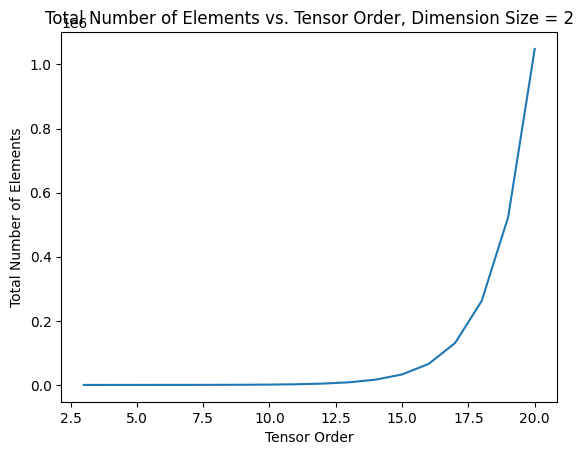

In [8]:
# Plot results
plt.plot(np.arange(3, 21), num_elements)
plt.xlabel('Tensor Order')
plt.ylabel('Total Number of Elements')
plt.title('Total Number of Elements vs. Tensor Order, Dimension Size = 2')
plt.show()

### Solution: Part 3

In [9]:
# Create tensors and collect information
num_elements = []
for i in range(3, 16): # loop through dimensions
    tensor = Tensor(np.ones(tuple(i*np.ones(3).astype('int')))) # array of 1s x number of dimensions, order 3
    num_elements.append(tensor.size)

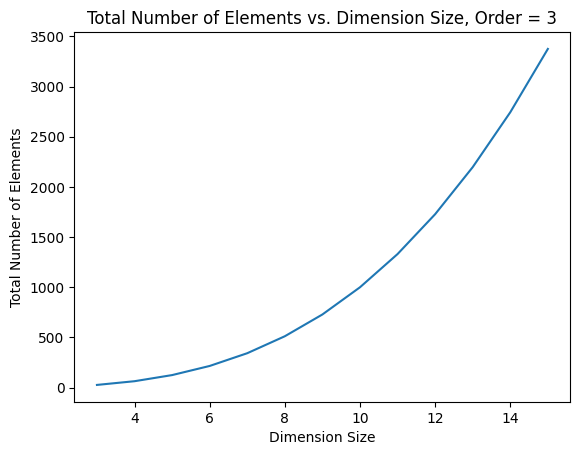

In [10]:
# Plot results
plt.plot(np.arange(3,16), num_elements)
plt.xlabel('Dimension Size')
plt.ylabel('Total Number of Elements')
plt.title('Total Number of Elements vs. Dimension Size, Order = 3')
plt.show()

### Solution: Part 4

We can formulate the total number of elements $X$ in a tensor by the following:
\begin{equation}
X = \Pi_{i=1}^{O} N_{i}
\end{equation}
Where $O$ is the order (total number of dimensions) and $N_{i}$ is the number of elements in each dimension. For a fixed number of elements $N=2$ in each dimension, the formula reduces to $X = 2^{O}$ which suggests an exponential relationship - the plot in solution part 2 demonstrates that the total number of elements $X$ increases expoentially when the tensor order $O$ increases from $3$ to $20$. In comparison, when the number of elements in each dimension (dimension size) is set to vary for a fixed order $O=3$, the formula becomes $X = N^{3}$, given that all dimensions have the same size $N$. We therefore observe a cubic relationship between $X$ and $N$ in the plot shown in solution part 3. From this we see that compared to increasing the dimension size of a tensor, increasing its order causes the total number of elements to increase more rapidly (i.e. exponential vs. cubic), causing it to suffer more from the "Curse of Dimensionality". The "Curse of Dimensionality" is a term coined by Richard Bellman that refers to the  phenomenon where the difficulty of analyzing and organizing data (e.g. computational complexity, volume of storage space etc.) increases exponentially as the dimensionality of the data increases. In the context of a tensor, increasing its order would require an exponentially growing amount of computational effort to store as well as performing operations on the tensor.

# Most common tensor substructures
<img src="./imgs/tensor_substructures.png" alt="Drawing" style="width: 500px;"/>

1. A **fiber** is a vector obtained by fixing all but one of the indices, e.g.  $\mathbf{\underline{X}}[i,:,k]$ is the mode-2 fiber $\mathbf{\underline{X}}$ (usually refered to as row fiber). 

1. Fixing all but two of the indices yields a matrix called a **slice** of a tensor, e.g. $\mathbf{\underline{X}}[:,:,k]$ is the mode-[1,2] slice (usually refered to as the frontal slice).

**Note:** The same principles and definitions can be applied to a tensor of an arbitrarily large order. In addition, you can obtain a **subtensor** by fixing at least three indices and letting the remaining ones vary.

In [11]:
# Mode-2 fiber
tensor.data[0,1,:]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [12]:
# Frontal slice
tensor.data[0,:,:]

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.

## **Assigment 2**

1. Create a tensor of order 4 which consists of 81 elements and display all its horizontal slices and any five row fibers.
2. Create a tensor of order 3 and shape `(4,2,5)`, where the values of each consequent frontal slice are doubled.

### Solution: Part 1

In [13]:
# Create a tensor of order 4
array_4d = np.arange(81).reshape((3,3,3,3))
tensor = Tensor(array_4d)
print(tensor)
tensor.data

This tensor is of order 4 and consists of 81 elements.
Sizes and names of its modes are (3, 3, 3, 3) and ['mode-0', 'mode-1', 'mode-2', 'mode-3'] respectively.


array([[[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8]],

        [[ 9, 10, 11],
         [12, 13, 14],
         [15, 16, 17]],

        [[18, 19, 20],
         [21, 22, 23],
         [24, 25, 26]]],


       [[[27, 28, 29],
         [30, 31, 32],
         [33, 34, 35]],

        [[36, 37, 38],
         [39, 40, 41],
         [42, 43, 44]],

        [[45, 46, 47],
         [48, 49, 50],
         [51, 52, 53]]],


       [[[54, 55, 56],
         [57, 58, 59],
         [60, 61, 62]],

        [[63, 64, 65],
         [66, 67, 68],
         [69, 70, 71]],

        [[72, 73, 74],
         [75, 76, 77],
         [78, 79, 80]]]])

In [14]:
# Display slices
# Slice = fixing all modes except two
# Horizontal slice = mode 1
for i in range(0,3):
    for j in range(0,3):
        print(f'Horizontal Slice of tensor({i},:,:,{j})')
        print(tensor.data[i,:,:,j])

Horizontal Slice of tensor(0,:,:,0)
[[ 0  3  6]
 [ 9 12 15]
 [18 21 24]]
Horizontal Slice of tensor(0,:,:,1)
[[ 1  4  7]
 [10 13 16]
 [19 22 25]]
Horizontal Slice of tensor(0,:,:,2)
[[ 2  5  8]
 [11 14 17]
 [20 23 26]]
Horizontal Slice of tensor(1,:,:,0)
[[27 30 33]
 [36 39 42]
 [45 48 51]]
Horizontal Slice of tensor(1,:,:,1)
[[28 31 34]
 [37 40 43]
 [46 49 52]]
Horizontal Slice of tensor(1,:,:,2)
[[29 32 35]
 [38 41 44]
 [47 50 53]]
Horizontal Slice of tensor(2,:,:,0)
[[54 57 60]
 [63 66 69]
 [72 75 78]]
Horizontal Slice of tensor(2,:,:,1)
[[55 58 61]
 [64 67 70]
 [73 76 79]]
Horizontal Slice of tensor(2,:,:,2)
[[56 59 62]
 [65 68 71]
 [74 77 80]]


In [15]:
# Display any 5 row fibers
# Fibre = fixing all modes except one
# Row fibre = mode 2
print(tensor.data[0,:,0,0])
print(tensor.data[1,:,0,0])
print(tensor.data[2,:,0,0])
print(tensor.data[0,:,1,0])
print(tensor.data[0,:,2,0])

[ 0  9 18]
[27 36 45]
[54 63 72]
[ 3 12 21]
[ 6 15 24]


### Solution: Part 2

In [16]:
# Create a tensor of order 3
array_3d = np.ones(40).reshape((4,2,5))
tensor =  Tensor(array_3d)

# frontal slice is = [:,:,k]
for i in range(0, tensor.shape[2]):
    tensor.data[:,:,i] = 2**i
    print('Frontal Slice {a}'.format(a=i+1))
    print(tensor.data[:,:,i])

Frontal Slice 1
[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]
Frontal Slice 2
[[2. 2.]
 [2. 2.]
 [2. 2.]
 [2. 2.]]
Frontal Slice 3
[[4. 4.]
 [4. 4.]
 [4. 4.]
 [4. 4.]]
Frontal Slice 4
[[8. 8.]
 [8. 8.]
 [8. 8.]
 [8. 8.]]
Frontal Slice 5
[[16. 16.]
 [16. 16.]
 [16. 16.]
 [16. 16.]]


# Unfolding

Conventionally, unfolding is considered to be a process of element mapping from a tensor to a matrix. In other words, it arranges the mode-$n$ fibers of a tensor to be the matrix columns. Thus, the mode-$n$ unfolding is denoted as:

$$\mathbf{\underline{A}} \xrightarrow{n} \mathbf{A}_{(n)}$$

Thus, this operations requires to specify a mode along which a tensor will be unfolded. For a third order tensor, a visual representation of such operation is as following

<img src="./imgs/unfolding.png" alt="Drawing" style="width: 600px;"/>

In `hottbox` this functionality is available through the corresponding methods of the `Tensor` object, for instance:

In [17]:
# Create 3-d array of data
array_3d = np.arange(24).reshape((2, 3, 4))

# Create tensor
tensor = Tensor(array_3d)

# Unfolding of a tensor
tensor.unfold(mode=0)

# Result preview
print(tensor)
tensor.data

This tensor is of order 2 and consists of 24 elements.
Sizes and names of its modes are (2, 12) and ['mode-0', 'mode-1_mode-2'] respectively.


array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]])

## **Assigment 3**

1. Create a tensor, $\mathbf{\underline{A}}$, of order 4, in such a way that its version unfolded along the second mode would have sizes `(5,72)`, that is $\mathbf{A}_{(n)} \in  \mathbb{R}^{5 \times 72}$. Validate your results by displaying the unfolded tensor.

### Solution : Part 1

In [18]:
# Create a tensor
sizes = (8,5,3,3) # 8*3*3 = 72 elements, mode-2 = 5
tensor = Tensor(np.arange(np.prod(sizes)).reshape(sizes))
print(tensor)

This tensor is of order 4 and consists of 360 elements.
Sizes and names of its modes are (8, 5, 3, 3) and ['mode-0', 'mode-1', 'mode-2', 'mode-3'] respectively.


In [19]:
# Display unfolded version
tensor.unfold(mode=1)
print(tensor)
tensor.data

This tensor is of order 2 and consists of 360 elements.
Sizes and names of its modes are (5, 72) and ['mode-1', 'mode-0_mode-2_mode-3'] respectively.


array([[  0,   1,   2,   3,   4,   5,   6,   7,   8,  45,  46,  47,  48,
         49,  50,  51,  52,  53,  90,  91,  92,  93,  94,  95,  96,  97,
         98, 135, 136, 137, 138, 139, 140, 141, 142, 143, 180, 181, 182,
        183, 184, 185, 186, 187, 188, 225, 226, 227, 228, 229, 230, 231,
        232, 233, 270, 271, 272, 273, 274, 275, 276, 277, 278, 315, 316,
        317, 318, 319, 320, 321, 322, 323],
       [  9,  10,  11,  12,  13,  14,  15,  16,  17,  54,  55,  56,  57,
         58,  59,  60,  61,  62,  99, 100, 101, 102, 103, 104, 105, 106,
        107, 144, 145, 146, 147, 148, 149, 150, 151, 152, 189, 190, 191,
        192, 193, 194, 195, 196, 197, 234, 235, 236, 237, 238, 239, 240,
        241, 242, 279, 280, 281, 282, 283, 284, 285, 286, 287, 324, 325,
        326, 327, 328, 329, 330, 331, 332],
       [ 18,  19,  20,  21,  22,  23,  24,  25,  26,  63,  64,  65,  66,
         67,  68,  69,  70,  71, 108, 109, 110, 111, 112, 113, 114, 115,
        116, 153, 154, 155, 156, 157

# Mode-n product 
<img src="./imgs/mode_n_product.png" alt="Drawing" style="width: 600px;"/>

The mode-$n$ product is a multiplication of a tensor  by a matrix along the $n^{th}$ mode of a tensor. This essentially means that each mode-$n$ fiber should be multiplied by this matrix. Mathematically, this can be expressed as:

$$\mathbf{\underline{X}} \times_n \mathbf{A} = \mathbf{\underline{Y}} \quad \Leftrightarrow  \quad \mathbf{Y}_{(n)} = \mathbf{A} \mathbf{X}_{(n)}  $$

In [20]:
I, J, K = 2, 3, 4
J_new = 5

# Create tensor
array_3d = np.arange(I * J * K).reshape(I, J ,K)
X = Tensor(array_3d)

# Create matrix
A = np.arange(J_new * J).reshape(J_new, J)

# Performs Mode-n product 
Y = X.mode_n_product(A, mode=1, inplace=False)

# Preview of resulting tensor
print(Y)

# Preview of its unfolded version
Y.unfold(mode=1, inplace=False).data

This tensor is of order 3 and consists of 40 elements.
Sizes and names of its modes are (2, 5, 4) and ['mode-0', 'mode-1', 'mode-2'] respectively.


array([[ 20,  23,  26,  29,  56,  59,  62,  65],
       [ 56,  68,  80,  92, 200, 212, 224, 236],
       [ 92, 113, 134, 155, 344, 365, 386, 407],
       [128, 158, 188, 218, 488, 518, 548, 578],
       [164, 203, 242, 281, 632, 671, 710, 749]])

## **Assignment 4**

1. Perform the mode-$n$ product of a 3-rd order tensor, $\mathbf{\underline{X}}$, with a matrix, $\mathbf{A} \in  \mathbb{R}^{5 \times 4}$, provided that the resulting tensor, $\mathbf{\underline{Y}}$, consists of `100` elements. Validate your results. 

> **Note:** You are encouraged to experiment with the optional parameter `inplace` and to investigate its effect on the result.

### Solution: Part 1

In [21]:
# Create original tensor 
I, J, K = 4, 4, 5 # 4x4x5 = 80 elements
J_new = 5 # changing mode-2 to 5, 4x5x5 = 100 elements

# Create tensor
array_3d = np.arange(I * J * K).reshape(I, J ,K)
X = Tensor(array_3d)

#Preview of the resulting tensor
print(X)
X.data

This tensor is of order 3 and consists of 80 elements.
Sizes and names of its modes are (4, 4, 5) and ['mode-0', 'mode-1', 'mode-2'] respectively.


array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]],

       [[20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34],
        [35, 36, 37, 38, 39]],

       [[40, 41, 42, 43, 44],
        [45, 46, 47, 48, 49],
        [50, 51, 52, 53, 54],
        [55, 56, 57, 58, 59]],

       [[60, 61, 62, 63, 64],
        [65, 66, 67, 68, 69],
        [70, 71, 72, 73, 74],
        [75, 76, 77, 78, 79]]])

In [22]:
# Create matrix
A = np.arange(J_new*J).reshape(J_new,J)
print(A)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]]


In [23]:
# Perform mode-n product 
# inplace = True will change the original tensor 
Y = X.mode_n_product(A, mode=1, inplace=False) # changes the dimension of second mode to 5
print(Y)

print("Unfolded version of the resulting tensor Y:")
Y = Y.unfold(mode=1, inplace=False).data
print(Y)

This tensor is of order 3 and consists of 100 elements.
Sizes and names of its modes are (4, 5, 5) and ['mode-0', 'mode-1', 'mode-2'] respectively.
Unfolded version of the resulting tensor Y:
[[  70   76   82   88   94  190  196  202  208  214  310  316  322  328
   334  430  436  442  448  454]
 [ 190  212  234  256  278  630  652  674  696  718 1070 1092 1114 1136
  1158 1510 1532 1554 1576 1598]
 [ 310  348  386  424  462 1070 1108 1146 1184 1222 1830 1868 1906 1944
  1982 2590 2628 2666 2704 2742]
 [ 430  484  538  592  646 1510 1564 1618 1672 1726 2590 2644 2698 2752
  2806 3670 3724 3778 3832 3886]
 [ 550  620  690  760  830 1950 2020 2090 2160 2230 3350 3420 3490 3560
  3630 4750 4820 4890 4960 5030]]


In [24]:
# Validate equivalence between the left and right hand side
# Check if Y = AX

# Calculate the product between A and X
AX = A@X.unfold(mode=1, inplace=False).data
print(AX)

# check if AX and Y are all the same
print("Checking if Y = AX:")
np.allclose(AX, Y.data)

[[  70   76   82   88   94  190  196  202  208  214  310  316  322  328
   334  430  436  442  448  454]
 [ 190  212  234  256  278  630  652  674  696  718 1070 1092 1114 1136
  1158 1510 1532 1554 1576 1598]
 [ 310  348  386  424  462 1070 1108 1146 1184 1222 1830 1868 1906 1944
  1982 2590 2628 2666 2704 2742]
 [ 430  484  538  592  646 1510 1564 1618 1672 1726 2590 2644 2698 2752
  2806 3670 3724 3778 3832 3886]
 [ 550  620  690  760  830 1950 2020 2090 2160 2230 3350 3420 3490 3560
  3630 4750 4820 4890 4960 5030]]
Checking if Y = AX:


True

# Properties of mode-n product

1. For distinct modes in a series of multiplications, the order of the multiplication is irrelevent: 

    $$\mathbf{\underline{X}} \times_n \mathbf{A} \times_m \mathbf{B} = \mathbf{\underline{X}} \times_m \mathbf{B} \times_n \mathbf{A} \quad (m \neq n)$$

1. However, this does not hold if the modes are the same :

    $$\mathbf{\underline{X}} \times_n \mathbf{A} \times_n \mathbf{B} = \mathbf{\underline{X}} \times_n (\mathbf{B}\mathbf{A})$$

## **Assignment 5**

1. Validate both of the above properties empirically 
2. Prove the second property analytically

> **Note:** Be aware of consequences of the optional parameter `inplace` (its default value is set to `True`).

### Solution: Part 1

In [25]:
# Create tensor
I, J, K = 2, 3, 4
array_3d = np.arange(I * J * K).reshape(I, J, K)
X = Tensor(array_3d)
print(X)

This tensor is of order 3 and consists of 24 elements.
Sizes and names of its modes are (2, 3, 4) and ['mode-0', 'mode-1', 'mode-2'] respectively.


In [26]:
# Create matrices
J_A = 4 # Matrix A to alter J
K_B = 3 # Matrix B to alter K
A = np.arange(J_A * J).reshape(J_A, J) # 4 x 3
B = np.arange(K_B * K).reshape(K_B, K) # 3 x 4

In [27]:
# Validate property 1
X_AB = X.mode_n_product(A, mode = 1, inplace = False).mode_n_product(B, mode = 2, inplace = False)
X_BA = X.mode_n_product(B, mode = 2, inplace = False).mode_n_product(A, mode = 1, inplace = False)

# Validate equivalence
np.allclose(X_AB.data, X_BA.data) # will print true or false

True

In [28]:
# Validate property 2
X_AB = X.mode_n_product(A, mode = 1, inplace = False).mode_n_product(B, mode = 1, inplace = False) # LHS
X_BA = X.mode_n_product(B @ A, mode = 1, inplace = False) # RHS

#Validate equivalence
np.allclose(X_AB.data, X_BA.data) # will print true or false

True

### Solution: Part 2

Use [LaTeX syntax](https://stackoverflow.com/questions/13208286/how-to-write-latex-in-ipython-notebook) for analytical deriviations for the second property below.


In [56]:
%%latex

Given a tensor $X$ of order $N$:
    $$\underline{{X}} \in \mathbb{R}^{I_1 \times I_2 \times \ldots \times I_N}$$
Where $I_{n}$ indexes each constituent mode. Its n-mode product with a matrix $A$ is defined as the multiplication of the tensor by the matrix along the $n^{th}$ mode, where essentially every mode-$n$ fibre is multiplied by $A$. The resulting tensor is denoted as $\underline{Y}$:
    $$\underline{{Y}} = \underline{{X}} \times_n {A} \quad \Leftrightarrow \quad {Y}_{(n)} = {A}{X}_{(n)}$$ 
Where the LHS is the n-mode product of $\underline{{X}}$ and ${A}$ resulting in $\underline{{Y}}$, and the RHS is the matrix multiplication of ${A}$ and the mode-$n$ unfolding of $\underline{{X}}$ resulting in the mode-$n$ unfolding of $\underline{{Y}}$. The entries of $\underline{{Y}}$ can be expressed as:
    $${Y}_{(i_1, \ldots, i_{n-1}, j_{n}, i_{n+1}, \ldots, i_N)} = \sum_{i_n} {A}_{(j_{n}, i_{n})} {X}_{(i_1, \ldots, i_{n-1}, i_n, i_{n+1}, \ldots, i_N)}$$
If we now perform the n-mode product of $\underline{{Y}}$ with another matrix ${B}$ along the $n^{th}$ mode, the resulting tensor $\underline{{Z}}$ can be expressed as:
    $${Z}_{(j_1, \ldots, j_{n-1}, k_{n}, j_{n+1}, \ldots, j_N)} = \sum_{j_n} {B}_{(k_{n}, j_{n})} {Y}_{(j_1, \ldots, j_{n-1}, j_n, j_{n+1}, \ldots, j_N)}$$
By substituting in the entries of $\underline{{Y}}$, we get:
    $${Z}_{(j_1, \ldots, j_{n-1}, k_{n}, j_{n+1}, \ldots, j_N)} = \sum_{j_n} {B}_{(k_{n}, j_{n})} \sum_{i_{n}} {A}_{(j_{n}, i_{n})} {X}_{(i_1, \ldots, i_{n-1}, i_{n}, i_{n+1}, \ldots, i_N)}$$
    $${Z}_{(j_1, \ldots, j_{n-1}, k_{n}, j_{n+1}, \ldots, j_N)} = \sum_{j_{n}} \sum_{i_n} {B}_{(k_{n}, j_{n})} {A}_{(j_{n}, i_{n})} {X}_{(i_1, \ldots, i_{n-1}, i_{n}, i_{n+1}, \ldots, i_N)}$$
    $${Z}_{(j_1, \ldots, j_{n-1}, k_{n}, j_{n+1}, \ldots, j_N)} = \sum_{i_{n}} \left({B}{A}\right)_{(k_{n}, i_{n})} {X}_{(i_1, \ldots, i_{n-1}, i_{n}, i_{n+1}, \ldots, i_N)}$$
    $${Z}_{(j_1, \ldots, j_{n-1}, k_{n}, j_{n+1}, \ldots, j_N)} = \left({B}{A}\right) {X}_{(i_1, \ldots, i_{n-1}, i_{n}, i_{n+1}, \ldots, i_N)}$$
Which is equivalent to the n-mode product of $\underline{{X}}$ with the matrix product of ${B}$ and ${A}$:
    $$\underline{{Z}} = \underline{{X}} \times_n \left({B}{A}\right)$$
Therefore, we have shown that:
    $$\underline{{X}} \times_n {A} \times_n {B} = \underline{{X}} \times_n \left({B}{A}\right)$$
Which completes the analytical proof for the second property.

<IPython.core.display.Latex object>